# Validations pour le multicouche
## Porte logique XOR - table 4.3
Commençons par construire le modèle: un modèle 2-2-1 suffit. Intuitivement, on peut se dire que chaque neurone de la couche cachée va apprendre une demi-séparation: "x1 OR x2" et "x1 AND NOT x2". Le neurone de la couche de sortie combinera ces activations pour donner le XOR.

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from multilayer.layer import Layer
from multilayer.model import Model
from utils import data_processing

model = Model([
    Layer(units=2, activation="sigmoid", input_size=2),
    Layer(units=1, activation="sigmoid"),
])

On importe le dataset du XOR depuis un fichier *.csv:

In [187]:
training_df = data_processing.load_dataframe_from_file("../datasets/table_4_3.csv")

# Obtain data in the form of
# x_train = np.array([[0,0],[0,1],[1,0],[1,1]],dtype=float)
# y_train = np.array([0,1,1,0],dtype=float)

# x_train = np.stack(training_df["inputs"].to_numpy())[:, 1:].astype(float) is more efficient but less understandable
x_train = np.array([x[1:] for x in training_df["inputs"]], dtype=float)

y_train = training_df["label"].to_numpy(dtype=float)
print(f"x_train =\n {x_train}")
print(f"y_train = {y_train}")

x_train =
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
y_train = [0. 1. 1. 0.]


Il ne reste "plus qu'à" entrainer le modèle en stockant ses données évoluant au fur et à mesure des epochs.

In [188]:
history = model.fit(x_train, y_train, 0.8, 0.001, 2000, "full-batch")

for case in x_train:
    answer = model.forward(case)
    print(f"Case: {case}, answer: {answer.round()}")

Training using full-batch strategy.
Training complete after 1852 epochs.
Case: [0. 0.], answer: [0.]
Case: [0. 1.], answer: [1.]
Case: [1. 0.], answer: [1.]
Case: [1. 1.], answer: [0.]


Les résultats sont généralement bons avec ces paramètres, bien qu'il arrive rarement que on ne converge pas assez rapidement pour les 2000 epochs.

Peut importe les résultats de la run, les graphiques sont néanmoins intéressants.

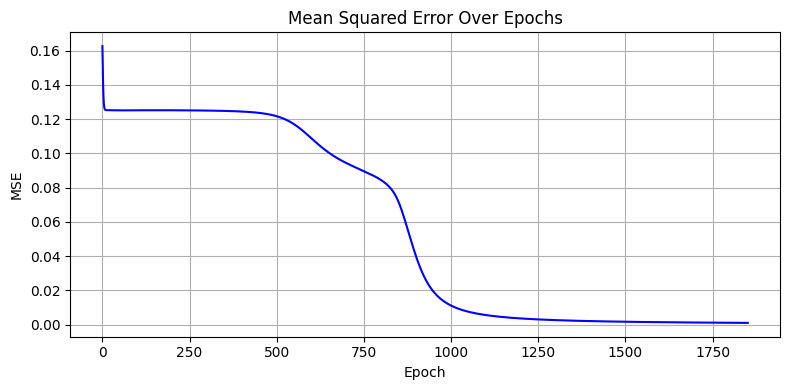

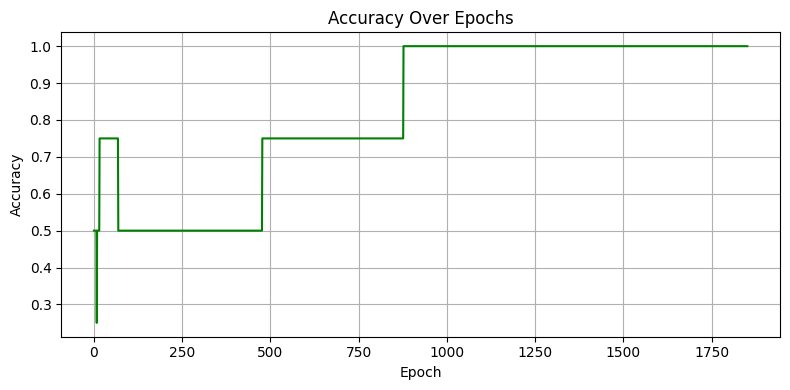

In [189]:
df = history.df

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

On voit bien une courbe représentant la minimization de l'erreur quadratique moyenne, ainsi que l'augmetation de la précision de la classification.

Reste à montrer les droites de décision avec les données.

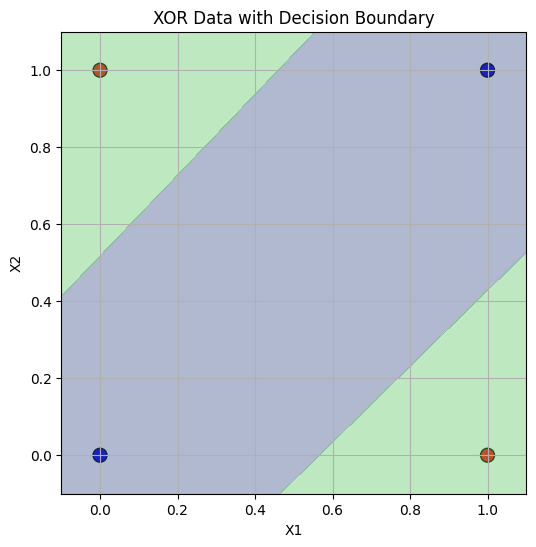

In [190]:
plt.figure(figsize=(6, 6))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='bwr', s=100, edgecolors='k')
# Create grid for decision boundary
x_min, x_max = x_train[:, 0].min() - 0.1, x_train[:, 0].max() + 0.1
y_min, y_max = x_train[:, 1].min() - 0.1, x_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
# Predict for each point in the grid
Z = np.array([model.forward([x, y]) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
# Plot decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='viridis', alpha=0.4)

# Labels and grid
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("XOR Data with Decision Boundary")
plt.grid(True)
plt.show()

Lors d'une convergeance réussie, on voit bien les deux droites de décision.

Il y a deux cas de figures possibles, correspondants à deux minimas équivalents:
- Les deux droites ont une pente **positives**, et la classe de (0,0) et (1,1) "coupe" la classe de (1,0) et (0,1) en deux
- les deux droites ont une pente **négatives**, et la classe de (1,0) et (0,1) "coupe" la classe (0,0) et (1,1) en deux

## Classification à 2 classes non linéairement séparables - table 4.12

On a choisi un modèle avec 10 neurones sur la couche cachée afin de bien délimiter les données, même si théoriquement 3 suffisent pour trianguler le nuage de points.

Seul un neurone est nécessaire sur la couche de sortie (un point est dans une classe, ou l'autre => choix binaire)

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from multilayer.layer import Layer
from multilayer.model import Model
from utils import data_processing

model = Model([
    Layer(units=10, activation="sigmoid", input_size=2),
    Layer(units=1, activation="sigmoid"),
])

training_df = data_processing.load_dataframe_from_file("../datasets/table_4_12.csv")
x_train = np.array([x[1:] for x in training_df["inputs"]], dtype=float)
y_train = training_df["label"].to_numpy(dtype=float)
 # Je vous épargne l'output, on se limite au 5 premiers ;-)
print(f"x_train =\n {x_train[0:5]}")
print(f"y_train = {y_train[0:5]}")

x_train =
 [[-1.56  0.93]
 [ 1.43 -1.29]
 [ 1.03  0.59]
 [ 0.21 -0.04]
 [-0.62  1.25]]
y_train = [0. 0. 1. 1. 0.]


In [192]:
history = model.fit(x_train, y_train, 0.5, 0.001, 2000, "stochastic")

indices = np.random.choice(len(x_train), size=5, replace=False)

for i in indices:
    case = x_train[i]
    target = y_train[i]
    answer = model.forward(case)
    print(f"Answer: {answer.round().item()}, Target: {target}")

Training using stochastic strategy.
Training complete after 163 epochs.
Answer: 0.0, Target: 0.0
Answer: 0.0, Target: 0.0
Answer: 0.0, Target: 0.0
Answer: 0.0, Target: 0.0
Answer: 0.0, Target: 0.0


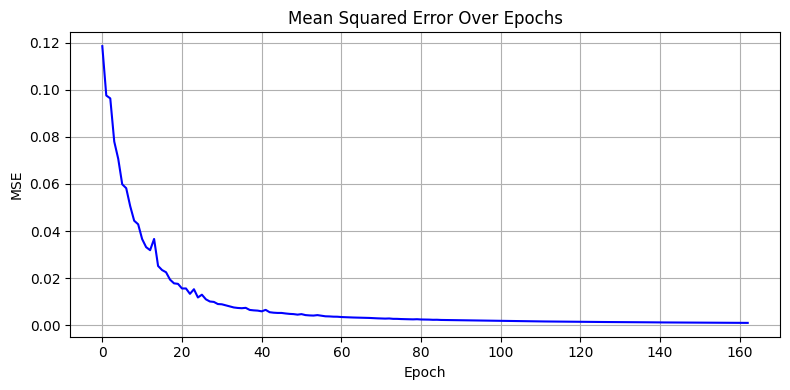

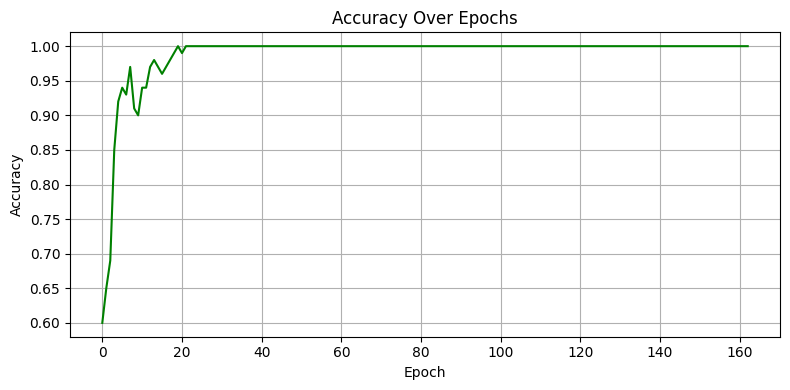

In [193]:
df = history.df

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

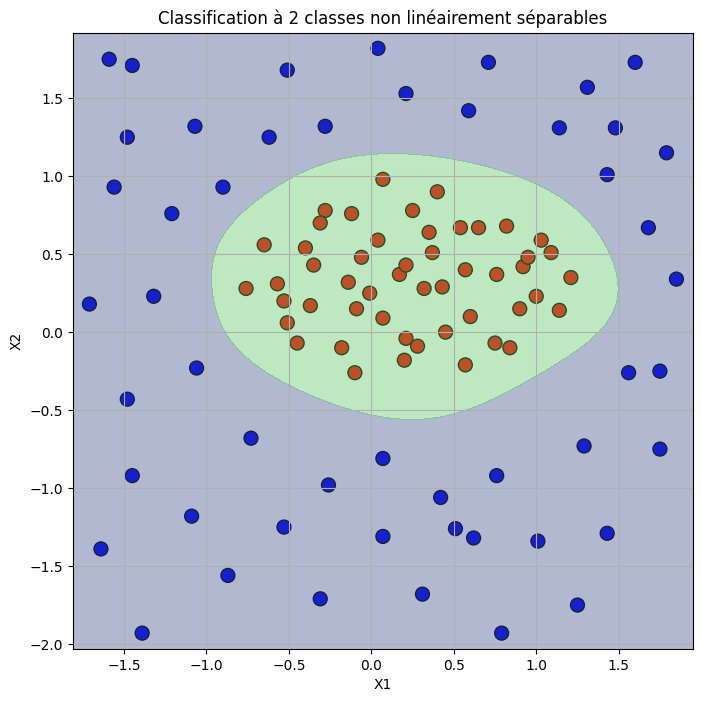

In [194]:
plt.figure(figsize=(8, 8))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='bwr', s=100, edgecolors='k')
# Create grid for decision boundary
x_min, x_max = x_train[:, 0].min() - 0.1, x_train[:, 0].max() + 0.1
y_min, y_max = x_train[:, 1].min() - 0.1, x_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
# Predict for each point in the grid
Z = np.array([model.forward([x, y]) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
# Plot decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='viridis', alpha=0.4)

# Labels and grid
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Classification à 2 classes non linéairement séparables")
plt.grid(True)
plt.show()

## Classification à 3 classes non linéairement séparables - table 4.14
Ici, 3 neurones sur la couche de sortie: chacun s'activant pour un point se trouvant dans la classe qu'il représente.

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from multilayer.layer import Layer
from multilayer.model import Model
from utils import data_processing

model = Model([
    Layer(units=10, activation="sigmoid", input_size=2),
    Layer(units=3, activation="sigmoid"),
])

training_df = data_processing.load_dataframe_from_file("../datasets/table_4_14.csv", 3)
x_train = np.array([x[1:] for x in training_df["inputs"]], dtype=float)
y_train = np.stack(training_df["label"].to_numpy())
# Je vous épargne l'output, on se limite au cinq premiers. ;-)
print(f"x_train =\n {x_train[0:5]}")
print(f"y_train =\n {y_train[0:5]}")

x_train =
 [[-0.87  0.7 ]
 [-0.62 -0.78]
 [ 0.73  1.09]
 [ 0.32 -0.2 ]
 [ 0.18 -1.07]]
y_train =
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [196]:
history = model.fit(x_train, y_train, 1.2, 0.001, 2000, "stochastic")

indices = np.random.choice(len(x_train), size=5, replace=False)

for i in indices:
    case = x_train[i]
    target = y_train[i]
    answer = model.forward(case)
    print(f"Answer: {answer.round()}, Target: {target}")

Training using stochastic strategy.
Training complete after 63 epochs.
Answer: [1. 0. 0.], Target: [1. 0. 0.]
Answer: [1. 0. 0.], Target: [1. 0. 0.]
Answer: [0. 0. 1.], Target: [0. 0. 1.]
Answer: [0. 1. 0.], Target: [0. 1. 0.]
Answer: [1. 0. 0.], Target: [1. 0. 0.]


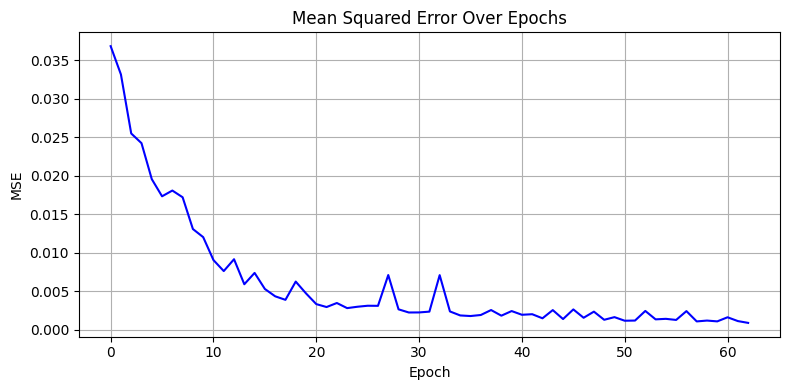

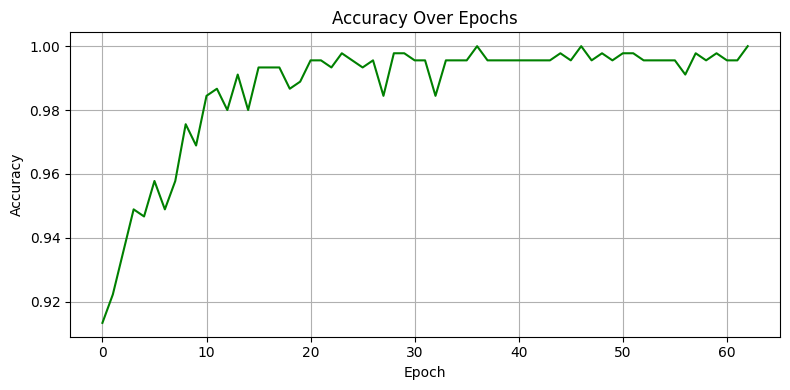

In [197]:
df = history.df

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

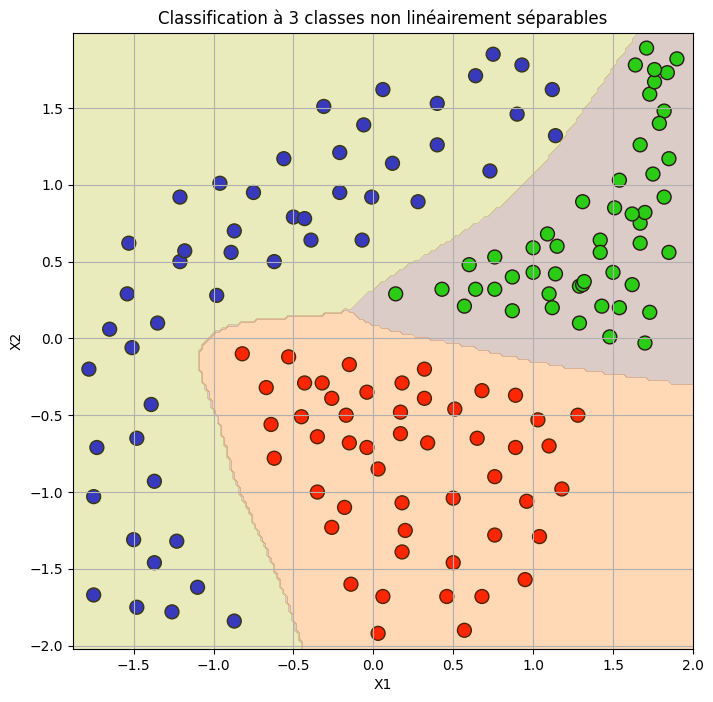

In [198]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=100, edgecolors='k')

# Create grid for decision boundary
x_min, x_max = x_train[:, 0].min() - 0.1, x_train[:, 0].max() + 0.1
y_min, y_max = x_train[:, 1].min() - 0.1, x_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict for each point in the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([np.argmax(model.forward(point)) for point in grid_points])
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z, levels=np.arange(4)-0.5, cmap='tab10', alpha=0.3)

# Labels and grid
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Classification à 3 classes non linéairement séparables")
plt.grid(True)
plt.show()

## Régression non-linéaire - table 4.17

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from multilayer.layer import Layer
from multilayer.model import Model
from utils import data_processing

model = Model([
    Layer(units=3, activation="tanh", input_size=1),
    Layer(units=1, activation="identity"),
])

training_df = data_processing.load_dataframe_from_file("../datasets/table_4_17.csv")
x_train = np.array([x[1:] for x in training_df["inputs"]], dtype=float)
y_train = training_df["label"].to_numpy(dtype=float)
 # Je vous épargne l'output, on se limite au cinq premiers. ;-)
print(f"x_train =\n {x_train[0:5]}")
print(f"y_train = {y_train[0:5]}")

x_train =
 [[-0.4 ]
 [ 1.7 ]
 [ 0.53]
 [-1.9 ]
 [ 0.53]]
y_train = [-1.32 -0.04 -0.07  1.09  0.12]


In [200]:
history = model.fit(x_train, y_train, 0.001, 0.04, 10000, "full-batch", verbose=True)

for case in x_train[0:5]:
    answer = model.forward(case)
    print(f"Case: {case}, answer: {answer}")

Training using full-batch strategy.
Epoch :1, MSE: 0.3088
Epoch :1001, MSE: 0.0484
Epoch :2001, MSE: 0.0484
Epoch :3001, MSE: 0.0484
Epoch :4001, MSE: 0.0484
Epoch :5001, MSE: 0.0484
Epoch :6001, MSE: 0.0484
Epoch :7001, MSE: 0.0484
Epoch :8001, MSE: 0.0484
Epoch :9001, MSE: 0.0484
Training stopped after 10000 epochs.
Case: [-0.4], answer: [-1.1101442]
Case: [1.7], answer: [0.18564375]
Case: [0.53], answer: [0.0494189]
Case: [-1.9], answer: [1.28679225]
Case: [0.53], answer: [0.0494189]


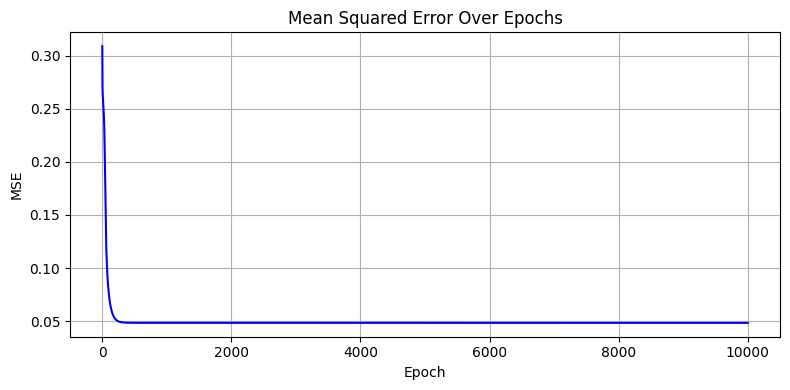

In [201]:
df = history.df

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

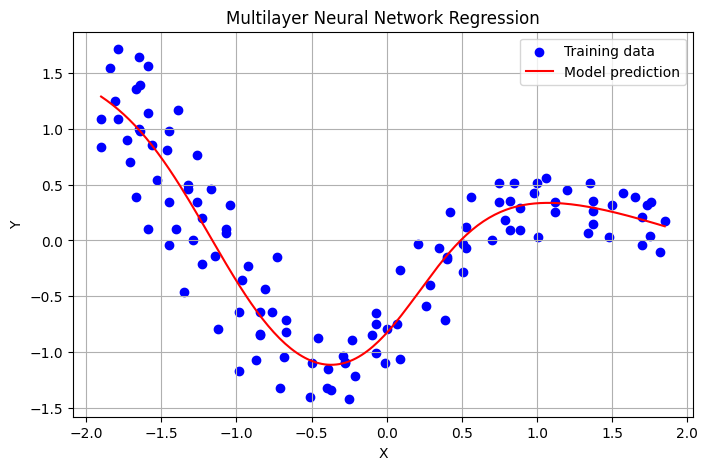

In [202]:
# Create test input range
x = np.linspace(x_train.min(), x_train.max(), 200).reshape(-1, 1)
y_pred = np.array([model.forward(x) for x in x])

# Ground truth (if available)
# y_true = some_function(x_test)  # optional, if you know the true function

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.plot(x, y_pred, color='red', label='Model prediction')
#plt.plot(x, y_true, color='green', label='True function')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Multilayer Neural Network Regression')
plt.legend()
plt.grid(True)
plt.show()
